# Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = os.path.join(os.getcwd(), "gdrive", "MyDrive","ORIE 5741 Final Project", "Data")
raw_data = pd.read_csv(os.path.join(path, "hotel_bookings.csv")).drop(['reservation_status_date', 'reservation_status'], axis=1)

In [ ]:
# columns in data
print("Columns in dataset:")
print(raw_data.columns)

Columns in dataset:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')


In [ ]:
# working with a subset of the data
raw_data = raw_data.sample(frac=0.2, random_state=1)

# Exploratory Data Analysis

## Percent Cancellations

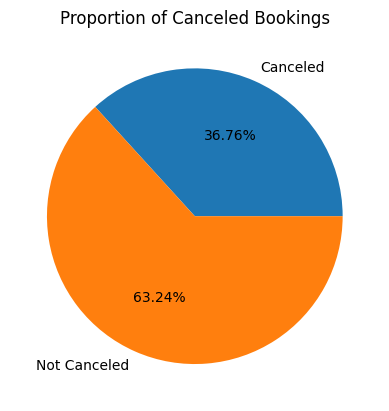

In [ ]:
canceled = len(raw_data[raw_data['is_canceled'] == 1])
not_canceled = len(raw_data[raw_data['is_canceled'] == 0])
total = len(raw_data)
def fmt(x):
    return '{:.2f}%'.format(x, total*x/100)

plt.pie([canceled/total, not_canceled/total], labels=['Canceled', 'Not Canceled'], autopct=fmt)
plt.title('Proportion of Canceled Bookings');

## Cancellations Over Time

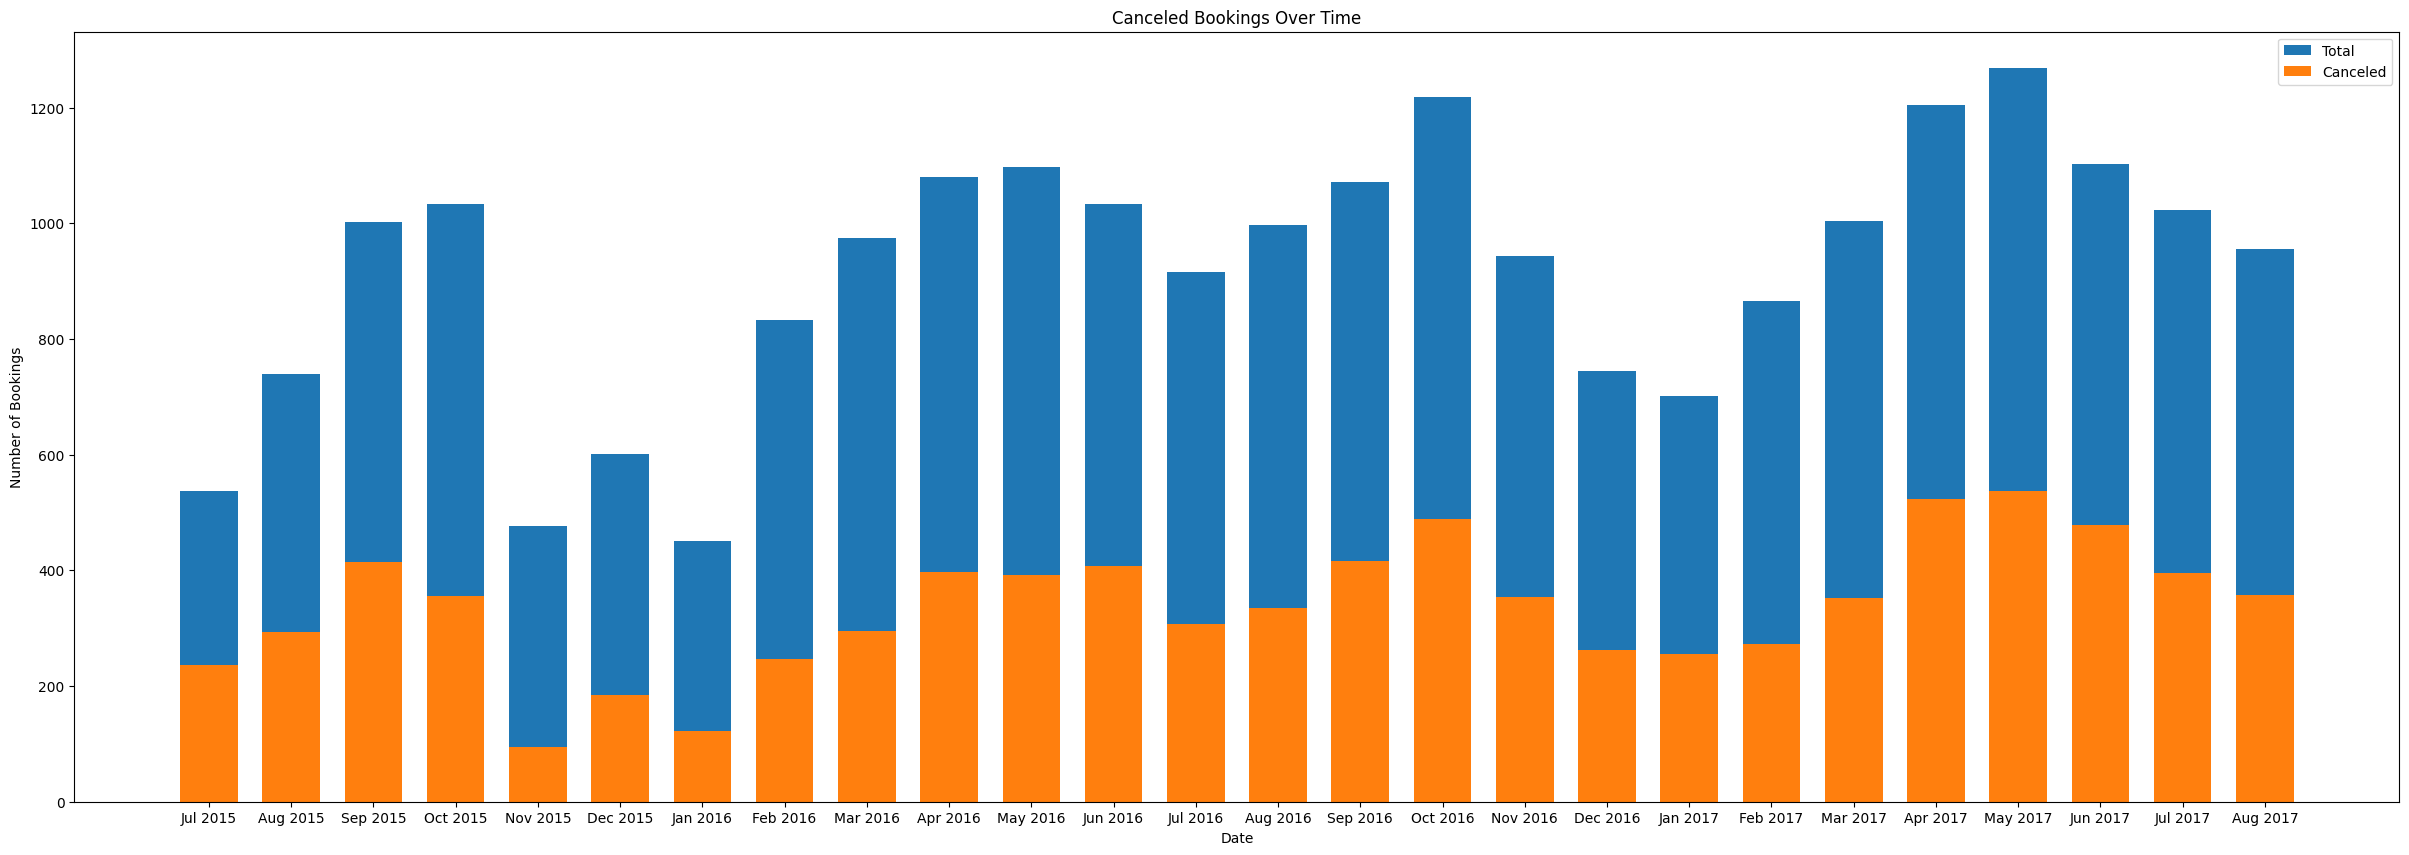

In [ ]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

canceled_df = raw_data.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['is_canceled'].sum()
canceled_df['arrival_date_month'] = pd.Categorical(canceled_df['arrival_date_month'], categories=months, ordered=True)
canceled_df = canceled_df.sort_values(['arrival_date_year', 'arrival_date_month'])
canceled_df['month_year'] = canceled_df['arrival_date_month'].astype(str).str[:3] + ' ' + canceled_df['arrival_date_year'].astype(str)

total_df = raw_data.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False)['is_canceled'].count()
total_df['arrival_date_month'] = pd.Categorical(total_df['arrival_date_month'], categories=months, ordered=True)
total_df = total_df.sort_values(['arrival_date_year', 'arrival_date_month'])
total_df['month_year'] = total_df['arrival_date_month'].astype(str).str[:3] + ' ' + total_df['arrival_date_year'].astype(str)

plt.figure(figsize=(30, 10))
plt.bar(total_df['month_year'], total_df['is_canceled'], width = 0.7)
plt.bar(canceled_df['month_year'], canceled_df['is_canceled'], width = 0.7)
plt.title('Canceled Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')

plt.legend(['Total', 'Canceled']);

# Data Preprocessing

## Cleaning

In [ ]:
print("Columns with null values:")
print(raw_data.columns[raw_data.isna().any()].tolist())

Columns with null values:
['children', 'country', 'agent', 'company']


In [ ]:
print("Number of null values in children column:", len(raw_data[raw_data['children'].isna() == True]))
print("Number of null values in country column:", len(raw_data[raw_data['country'].isna() == True]))
print("Number of null values in agent column:", len(raw_data[raw_data['agent'].isna() == True]))
print("Number of null values in company column:", len(raw_data[raw_data['company'].isna() == True]))

Number of null values in children column: 1
Number of null values in country column: 103
Number of null values in agent column: 3374
Number of null values in company column: 22460


In [ ]:
# dropping null values in country column 
# since it is a not a significant portion of data
raw_data = raw_data[raw_data['country'].isna() == False]

In [ ]:
# replacing null values with 0 in children column
raw_data['children'] = raw_data['children'].fillna(0)

In [ ]:
# looking at unique agents in dataset
unique_agents = raw_data['agent'].unique()
unique_agents.sort()
print("Unique agents:")
print(unique_agents)
print("Total Number:", len(unique_agents))

# replacing null values with 0 in agent column
raw_data['agent'] = raw_data['agent'].fillna(0)

Unique agents:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  44.
  45.  47.  50.  52.  53.  55.  56.  57.  58.  60.  63.  64.  66.  67.
  68.  69.  71.  72.  74.  75.  77.  78.  79.  81.  82.  83.  85.  86.
  87.  88.  89.  90.  91.  92.  94.  95.  96.  98.  99. 103. 104. 105.
 106. 110. 111. 112. 115. 117. 118. 119. 121. 126. 127. 128. 129. 132.
 133. 134. 135. 138. 139. 141. 142. 143. 146. 147. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 162. 163. 165. 168. 170. 171. 173.
 174. 175. 177. 179. 181. 182. 183. 184. 185. 187. 191. 192. 193. 195.
 196. 197. 201. 205. 208. 210. 213. 214. 215. 219. 220. 223. 227. 229.
 234. 235. 236. 240. 241. 242. 243. 244. 245. 248. 249. 250. 251. 252.
 253. 254. 256. 257. 261. 262. 267. 269. 270. 273. 275. 281. 286. 287.
 288. 290. 296. 298. 305. 306. 307. 308. 310. 313. 314. 315. 3

In [ ]:
# looking at unique agents in dataset
unique_companies = raw_data['company'].unique()
unique_companies.sort()
print("Unique companies:")
print(unique_companies)
print("Total Number:", len(unique_companies))

# replacing null values with 0 in company column
raw_data['company'] = raw_data['company'].fillna(0)

Unique companies:
[  9.  11.  12.  14.  16.  18.  20.  22.  31.  34.  37.  38.  40.  43.
  45.  46.  47.  51.  59.  61.  62.  67.  68.  71.  72.  73.  78.  81.
  82.  86.  88.  91.  92.  93.  94.  96.  99. 100. 102. 105. 106. 107.
 108. 110. 112. 113. 116. 118. 120. 122. 130. 135. 137. 142. 143. 144.
 146. 148. 150. 153. 154. 158. 159. 163. 165. 167. 169. 174. 178. 179.
 183. 185. 186. 193. 195. 197. 200. 202. 203. 204. 207. 209. 215. 216.
 218. 219. 220. 221. 223. 227. 229. 233. 238. 242. 243. 245. 250. 251.
 254. 255. 257. 263. 268. 269. 270. 272. 274. 275. 278. 280. 281. 282.
 286. 289. 290. 292. 297. 304. 305. 307. 308. 311. 312. 314. 317. 321.
 323. 324. 325. 329. 331. 333. 334. 337. 338. 342. 343. 346. 348. 349.
 351. 353. 355. 357. 358. 360. 361. 364. 365. 366. 367. 369. 371. 372.
 376. 377. 379. 380. 382. 383. 384. 385. 388. 390. 394. 396. 397. 399.
 405. 407. 408. 409. 410. 416. 418. 421. 424. 435. 437. 439. 443. 450.
 451. 452. 455. 456. 458. 459. 465. 477. 479. 484. 485. 486

In [ ]:
# numerical columns
numerical_cols = ['lead_time', 'stays_in_weekend_nights',
                'stays_in_week_nights', 'adults', 'children', 'babies',
                'previous_cancellations', 'previous_bookings_not_canceled', 
                'booking_changes', 'days_in_waiting_list', 'adr',
                'required_car_parking_spaces', 'total_of_special_requests']

# categorical columns
ordinal_cols = ['arrival_date_year', 'arrival_date_month', 
                'arrival_date_week_number', 'arrival_date_day_of_month', 
                'agent', 'company']
boolean = ['is_repeated_guest', 'is_canceled']
nominal_cols = ['hotel', 'meal', 'country', 'market_segment', 
                'distribution_channel', 'reserved_room_type',
                'assigned_room_type', 'deposit_type', 'customer_type']

## Correlation Analysis

In [ ]:
numeric = raw_data[numerical_cols]
res = stats.spearmanr(numeric)

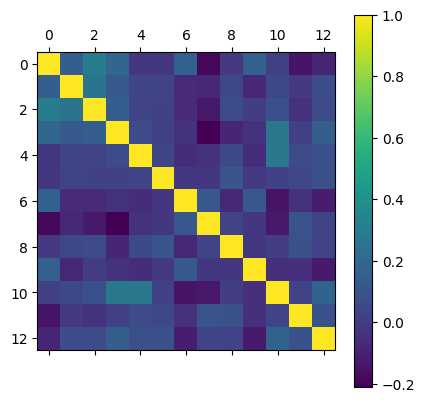

In [ ]:
plt.matshow(pd.DataFrame(res.statistic))
plt.colorbar()
plt.show()

In [ ]:
high_corr = np.where((res.statistic > 0.5) | (res.statistic < -0.5))
high_corr =[(res.statistic.columns[x], res.statistic.columns[y]) for x, y in zip(*high_corr) if x!=y and x<y]
print("Variables with high correlation:")
print(high_corr)

Variables with high correlation:
[]


## Encoding Categorical Variables

### Encoding Nominal

In [ ]:
raw_data['arrival_date_month'] = raw_data['arrival_date_month'].replace({'January': 1, 
                                                                         'February': 2,
                                                                         'March': 3, 
                                                                         'April': 4, 
                                                                         'May': 5, 
                                                                         'June': 6,
                                                                         'July': 7,
                                                                         'August': 8,
                                                                         'September': 9,
                                                                         'October': 10,
                                                                         'November': 11,
                                                                         'December': 12})

### Encoding Categorical

In [ ]:
raw_data = pd.get_dummies(raw_data, prefix=nominal_cols, columns=nominal_cols)

In [ ]:
# final dataset
raw_data

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
8030,1,238,2016,9,37,7,0,3,1,0.0,...,0,0,0,0,1,0,0,0,1,0
37532,0,33,2017,6,25,19,1,1,2,0.0,...,0,0,0,1,0,0,0,0,1,0
76865,1,239,2015,10,42,17,0,1,2,0.0,...,0,0,0,0,1,0,0,0,1,0
1960,0,64,2015,9,39,24,0,3,2,0.0,...,0,0,0,1,0,0,0,0,1,0
98971,0,34,2016,10,41,2,2,3,2,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101117,0,44,2016,11,45,1,0,5,2,0.0,...,0,0,0,1,0,0,0,0,1,0
84909,0,39,2016,3,10,4,0,2,1,0.0,...,0,0,0,1,0,0,0,0,0,1
99765,0,10,2016,10,42,13,1,3,3,0.0,...,0,0,0,1,0,0,0,0,1,0
62196,1,33,2017,1,1,4,0,4,1,0.0,...,0,0,0,1,0,0,0,0,1,0


# Exporting Processed Dataset

In [ ]:
raw_data.to_csv('processed_hotel_bookings.csv')